<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/cuaderno%203/Serie_de_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transformada de Fourier


Ejercicio 1
Presente una simulación relacionada con la proyección lineal de a sobre b E R^2. El código debe permitir al usuario ingresar las componentes de los dos vectores, calcular el factor de escala de la proyección y graficar los vectores de entrada y el proyectado (usar la función pyplot.arrow).

In [5]:
import matplotlib.pyplot as plt
from matplotlib import *
import numpy as np
import matplotlib.animation as animation

Ingrese los puntos del vector a: 
1
3
Ingrese los puntos del vector b: 
2
4
El factor de escala de la proyeccion es: 0.7



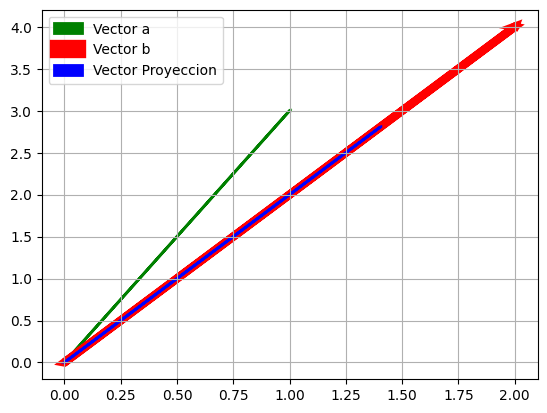

In [3]:
import matplotlib.pyplot as plt
from matplotlib import *
import numpy as np

def proy(a,b):
  pp=0
  for i in range(0,len(a)):
      pp=pp+(a[i]*b[i])
  return pp

a=[]
b=[]
c=[]
print("Ingrese los puntos del vector a: ")
for i in range(0,2):
  a.append(float(input("")))

print("Ingrese los puntos del vector b: ")
for i in range(0,2):
  b.append(float(input("")))

ProdPun=proy(a,b) #Producto punto
NB=(np.linalg.norm(b))**2 #NB es la norma del vector, se llama a un comando predefinido incluido en Numpy

Proyeccion=(ProdPun/NB)
for i in range(0,2):
  c.append(Proyeccion*b[i])

print("El factor de escala de la proyeccion es:",round(Proyeccion,2))
print()
plt.figure()
plt.grid()
plt.arrow(0,0,a[0],a[1],color='green',label='Vector a',linewidth=2)
plt.arrow(0,0,b[0],b[1],color='red',label='Vector b',linewidth=6)
plt.arrow(0,0,c[0],c[1],color='blue',label='Vector Proyeccion',linewidth=2)
plt.legend()
plt.show()

Ejercicio 2:
Encontrar la representación por serie exponencial de Fourier de la señal x(t)=Arectτ(t) , con t∈[−τ/2,τ/2] . Graficar el espectro, la fase del espectro, la reconstrucción para n∈{0,±1,±2,…} , y determinar el valor del error relativo para cada valor de n . Utilice el ambiente animación de Python para mostrar los resultados.

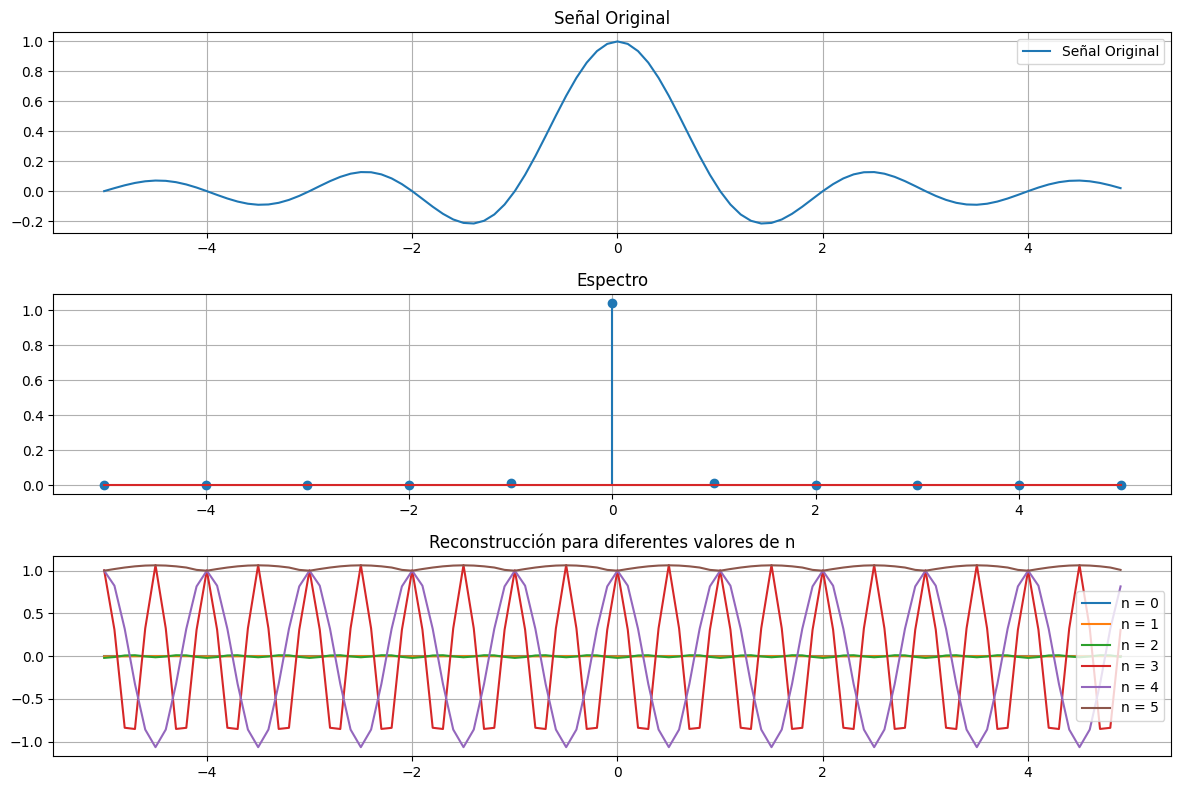

In [15]:
# Parámetros de la señal
A = 1.0  # Amplitud
tau = 1.0  # Duración del rectángulo
T = 10.0  # Período de muestreo
t = np.arange(-5, 5, 1 / T)  # Vector de tiempo

# Función para calcular la serie exponencial de Fourier
def fourier_series_coefficients(x, n_max):
    coefficients = []
    for n in range(-n_max, n_max + 1):
        c = np.trapz(x * np.exp(-1j * 2 * np.pi * n * t), t)
        coefficients.append(c)
    return coefficients

# Cálculo de coeficientes
n_max = 5  # Número máximo de términos de la serie
coefficients = fourier_series_coefficients(A * np.sinc(tau * t), n_max)

# Cálculo de la reconstrucción
def fourier_series_reconstruction(coefficients, n_max):
    reconstruction = np.zeros_like(t, dtype=np.complex128)
    for n in range(-n_max, n_max + 1):
        reconstruction += coefficients[n + n_max] * np.exp(1j * 2 * np.pi * n * t)
    return reconstruction

reconstruction = fourier_series_reconstruction(coefficients, n_max).real

# Gráficos
plt.figure(figsize=(12, 8))

# Gráfico de la señal original
plt.subplot(3, 1, 1)
plt.plot(t, A * np.sinc(tau * t), label='Señal Original')
plt.title('Señal Original')
plt.grid(True)
plt.legend()

# Gráfico del espectro
plt.subplot(3, 1, 2)
plt.stem(range(-n_max, n_max + 1), np.abs(coefficients))
plt.title('Espectro')
plt.grid(True)

# Gráfico de la reconstrucción para diferentes valores de n
plt.subplot(3, 1, 3)
for n in range(0, n_max + 1):
    reconstruction_n = fourier_series_reconstruction(coefficients, n).real
    plt.plot(t, reconstruction_n, label=f'n = {n}')
plt.title('Reconstrucción para diferentes valores de n')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
